In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

In [2]:
# TD2 : exercice 2

In [3]:
def regressionLineaire(x, y):
    n = len(x)
    sx, sy, sxy, sx2 = sum(x), sum(y), np.dot(x, y), np.dot(x, x)
    alpha = (sxy - sx*sy/n)/(sx2 - sx**2/n)
    beta = sy/n - alpha*sx/n
    return np.array([alpha, beta])

In [4]:
n = 100
x = np.random.rand(n)
y = -5 + 12*x + np.random.rand(n)

In [5]:
[alpha, beta] = regressionLineaire(x, y)
print(alpha, beta)

12.064206000085678 -4.551044458257961


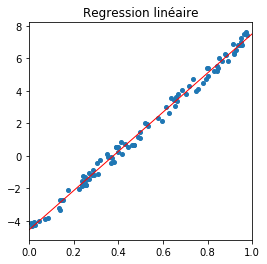

In [6]:
fig = plt.figure(figsize = (4, 4))
plt.plot(x, y, linestyle = 'none', Marker = 'o', ms = 4.0)
tt = np.linspace(0, 1, 100)
plt.plot(tt, beta + alpha*tt, linestyle = '-', lw = 1.0, color = 'red')
ax = plt.gca()
ax.set_xlim([0, 1])
plt.title('Regression linéaire')
plt.show()

In [7]:
# TD2 : exercice 3

In [8]:
def regressionPolynomiale(x, y, k):
    # x, y : vecteurs colonne donnant les points (xi,yi)
    # k : ordre de la régression. Le polynôme optimal sera de 
    # degré au plus k
    n = len(x)
    M = np.zeros((n, k + 1))
    # on cré la matrice M
    for i in range(n):
        for j in range(k + 1):
            M[i, j] = x[i]**j
    
    return np.linalg.solve(np.dot(M.T, M), np.dot(M.T, y)) # on résout le système linéaire

In [9]:
n = 100
x = np.random.rand(n)
y = -5 + 12*x + 3*x**2 + np.random.randn(n)

In [10]:
k = 3
beta = regressionPolynomiale(x, y, k)
print(beta)

[-5.11779229 14.6091277  -4.05566742  4.81748948]


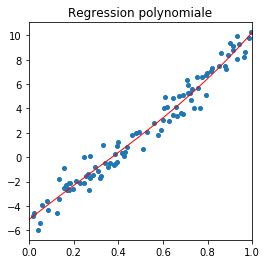

In [11]:
fig = plt.figure(figsize = (4, 4))
plt.plot(x, y, linestyle = 'none', Marker = 'o', ms = 4.0)
tt = np.linspace(0, 1, 100)
plt.plot(tt, [np.dot(beta, [t**i for i in range(k + 1)]) for t in tt], linestyle = '-', lw = 1.0, color = 'red')
ax = plt.gca()
ax.set_xlim([0, 1])
plt.title('Regression polynomiale')
plt.show()

In [12]:
# TD2 : exercice 4

In [ ]:
# 3)

In [13]:
def dichotomie(f, a, b, epsilon):
    # f fonction strictement monotone, a, b bornes de l'invertal de définition de f
    # renvoie l'approximation à epsilon près de l'unique 0 de f sur [a, b]
    c = (a + b)/2
    sfa, fc = np.sign(f(a)), f(c)
    c_list = []
    # epsilon = 1e-10
    n = 0
    while abs(fc) > epsilon and n < 50:
        if np.sign(fc) == sfa:
            a = c
        else:
            b = c
        c = (a + b)/2
        fc = f(c)
        c_list.append(c)
        n += 1
    
    return c, c_list    

In [ ]:
# 5)

In [14]:
def f(x):
    return x**3-2

In [33]:
c, c_list = dichotomie(f, 0, 2, 1e-5)
print(c)
print('On est censé obtenir 2^1/3: ', 2**(1/3))

1.2599220275878906
On est censé obtenir 2^1/3:  1.2599210498948732


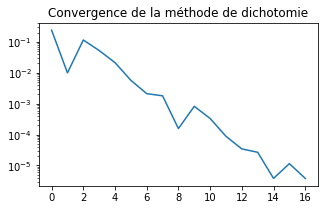

In [16]:
fig = plt.figure(figsize = (5, 3))
plt.semilogy([abs(c_list[i] - c) for i in range(len(c_list)-1)]) # on représente l'erreur entre chaque itéré et la
# valeur limite obtenue via la fonction semilogy qui met l'axe des ordonnées en échelle log.
plt.title('Convergence de la méthode de dichotomie')
plt.show()

On remarque que l'on obtient typiquement une droite, ce qui signifie que $\ln(e) = -p n + C$ où $e$ est l'erreur. Donc $e = C'\exp(-p)^n$, c'est-à-dire la convergence est linéaire (on a bien $\|c_{k+1} - c\|\leq exp(-p) \|c_{k} - c\|$ pour tout k).

In [17]:
print('La pente est censée être ', -np.log(2)/np.log(10)) # log10(1/2), par définition de la méthode de dichotomie

La pente est censée être  -0.30102999566398114


In [18]:
[alpha, beta] = regressionLineaire([i for i in range(len(c_list)-1)], np.log10([abs(c_list[i] - c) for i in range(len(c_list)-1)]))
print('On trouve par regression linéaire ', alpha)

On trouve par regression linéaire  -0.2962363115216606


On retrouve donc la pente théorique.

In [ ]:
# 6) et 7)

In [19]:
def diffFinieDroite(f):
    # renvoie une fonction qui approxime la dérivée par formule des différences finies à droite.
    epsilon = 1e-8
    def df(x):
        return (f(x + epsilon) - f(x))/epsilon
    return df

In [20]:
def g(x):
    return x**2 + 5*(1 - np.cos(2*np.pi*x))

In [21]:
dg_approx = diffFinieDroite(g) # fonction approximant la dérivée de f

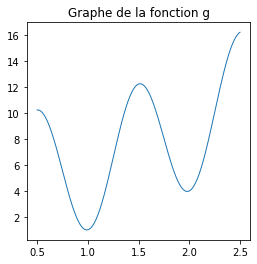

In [22]:
tt = np.linspace(.5, 2.5, 200)
fig = plt.figure(figsize = (4, 4))
plt.plot(tt, [g(t) for t in tt], linestyle = '-', lw = 1.0)
plt.title('Graphe de la fonction g')
plt.show()

On voit que l'on a deux minima locaux à trouver par la méthode de dichotomie codée.

In [23]:
c, c_list = dichotomie(dg_approx, .6, 1.4, 1e-5)
print('Premier minimum local : ', c)

Premier minimum local :  0.9899629592895509


In [24]:
c, c_list = dichotomie(dg_approx, 1.6, 2.4, 1e-5)
print('Deuxième minimum local : ', c)

Deuxième minimum local :  1.979886054992676


In [ ]:
# 8)

In [25]:
def dg(x):
    # expression litérale de g'
    return 2*x + 10*np.pi*np.sin(2*np.pi*x)

In [26]:
c, c_list = dichotomie(dg, .6, 1.4, 1e-14) # on calcule la valeur très précise d'un min local pour illustrer la cv.

In [27]:
c1, c1_list = dichotomie(dg_approx, .6, 1.4, 1e-10)
c2, c2_list = dichotomie(dg, .6, 1.4, 1e-10)

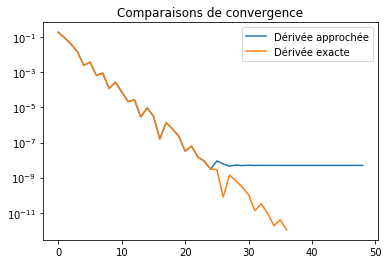

In [30]:
fig = plt.figure(figsize = (6, 4))
plt.semilogy([abs(c1_list[i] - c) for i in range(len(c1_list)-1)], label = 'Dérivée approchée')
plt.semilogy([abs(c2_list[i] - c) for i in range(len(c2_list)-1)], label = 'Dérivée exacte')
plt.title('Comparaisons de convergence')
plt.legend()
plt.show()

A partir d'un certain rang, on a un décrochage de la décroissance de l'erreur lorsque l'on approxime la dérivée par différences finies. On pourrait montrer que l'erreur commise sur la dérivée est typiquement de l'ordre de $10^{-8}$ vu le choix de $\varepsilon = 10^{-8}$. Donc il n'est pas possible de localiser le minimum plus précisemment que typiquement $10^{-8}$. D'où l'erreur qui stagne.